## Especialização em Inteligência Artificial – IFMG
## Análise de Séries Temporais - Lista de exercícios 2
**Aluno**: Alexandre Fortes Santana  

**Professor**: Carlos Severiano

[Notebook: https://github.com/alexandrefortes/series-temporais/blob/main/Lista%20de%20Exercicios%2002.ipynb](https://github.com/alexandrefortes/series-temporais/blob/main/Lista%20de%20Exercicios%2002.ipynb) 

### Exercício 1

1. A série ilustrada abaixo, feita pelo IBGE, demonstra o volume de vendas mensal no Brasil. Ela está disponível no arquivo vendas_brasil.csv, em anexo a esta atividade, e também pode ser obtida em diferentes formatos no endereço: https://www.ibge.gov.br/estatisticas/economicas/comercio/9227-pesquisa-mensal-de-comercio.html?=&t=series-historicas

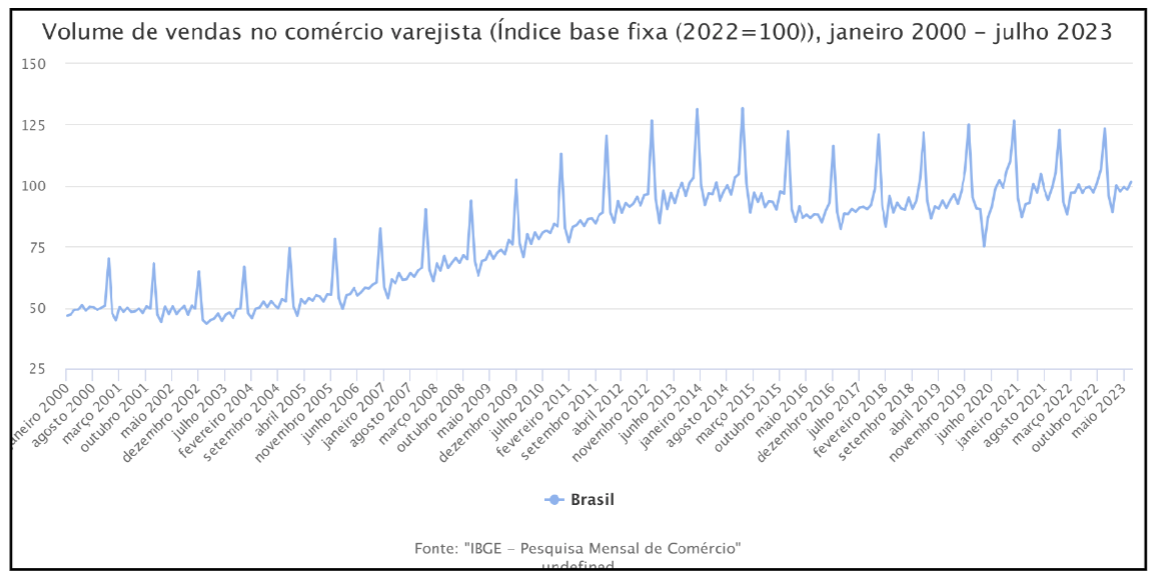

Realize uma análise e decomposição da série a partir dos passos definidos em a e b.
a. Roteiro 1:  
    i. Estimar tendência através de ajuste exponencial  
    ii. Eliminar a tendência estimada  
    iii. Estimar a sazonalidade através de médias móveis  
    iv. Eliminar a sazonalidade  
    v. Analisar o resíduo para verificar se pertence a uma distribuição iid  

b. Roteiro 2:  
i. Eliminar a tendência através de diferenciação  
ii. Eliminar a sazonalidade através de diferenciação  
iii. Analisar o resíduo para verificar se pertence a uma distribuição iid  

A partir da análise das séries decompostas, avalie se algum dos modelos é adequado para representar a série.

C:\Users\alexa\AppData\Local\Temp\ipykernel_16400\971433585.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('vendas_brasil.csv', parse_dates=['Mês'], dayfirst=True)


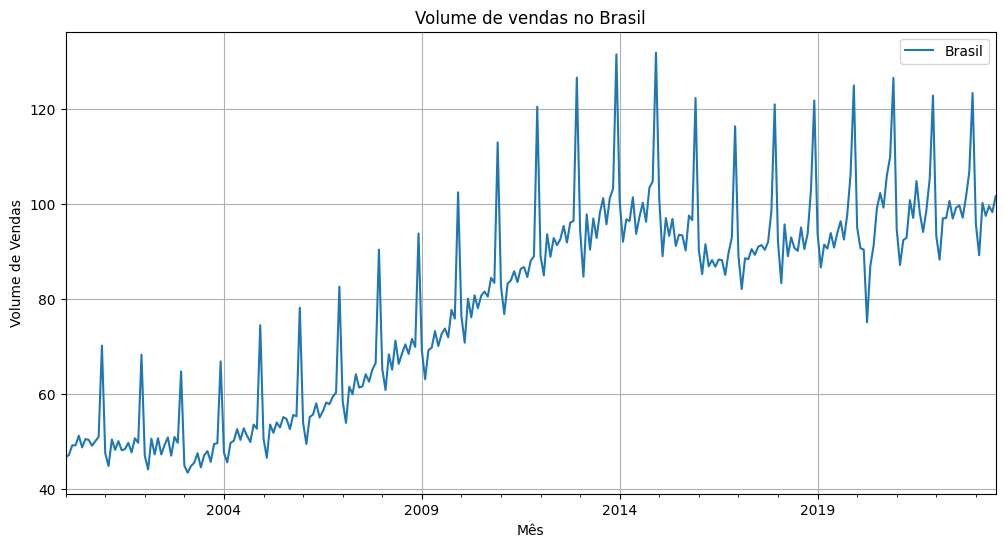

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy import stats

# Carregando os dados
df = pd.read_csv('vendas_brasil.csv', parse_dates=['Mês'], dayfirst=True)
df.set_index('Mês', inplace=True)

df.plot(figsize=(12,6))
plt.title("Volume de vendas no Brasil")
plt.ylabel("Volume de Vendas")
plt.grid(True)
plt.show()

a. Roteiro 1:

i. Estimar tendência através de ajuste exponencial:

c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


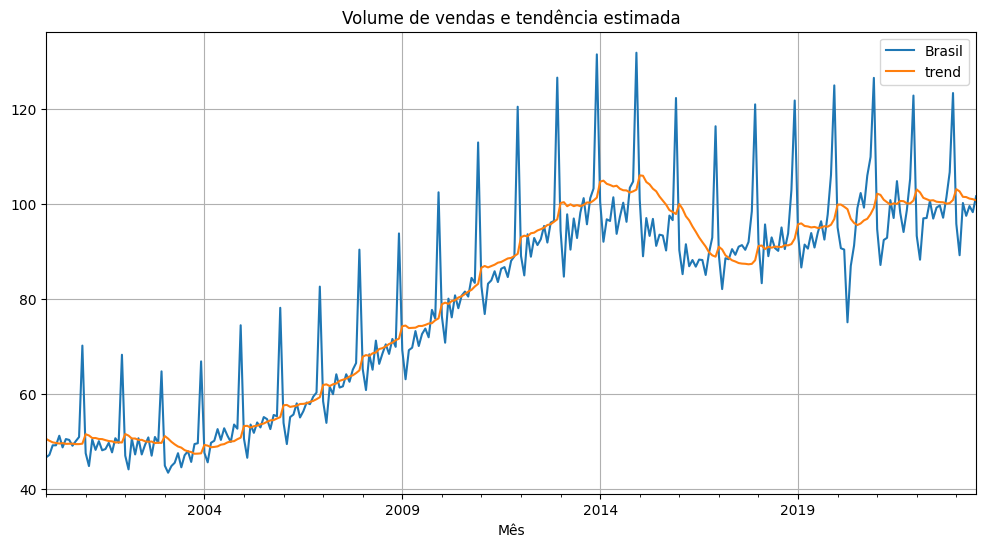

In [6]:
model = ExponentialSmoothing(df['Brasil'], trend='add', seasonal=None)
fit = model.fit()
df['trend'] = fit.fittedvalues

df[['Brasil', 'trend']].plot(figsize=(12,6))
plt.title("Volume de vendas e tendência estimada")
plt.grid(True)
plt.show()

ii. Eliminar a tendência estimada:

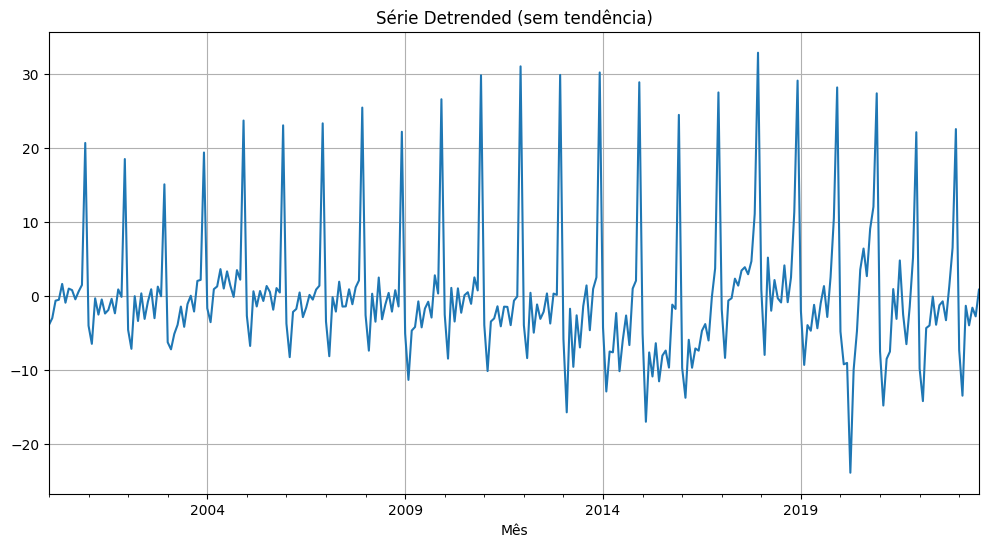

In [7]:
df['detrended'] = df['Brasil'] - df['trend']
df['detrended'].plot(figsize=(12,6))
plt.title("Série Detrended (sem tendência)")
plt.grid(True)
plt.show()

iii. Estimar a sazonalidade através de médias móveis:

Neste caso, assumindo que a sazonalidade é anual (o que é comum para vendas mensais), usaremos uma média móvel de 12 meses:

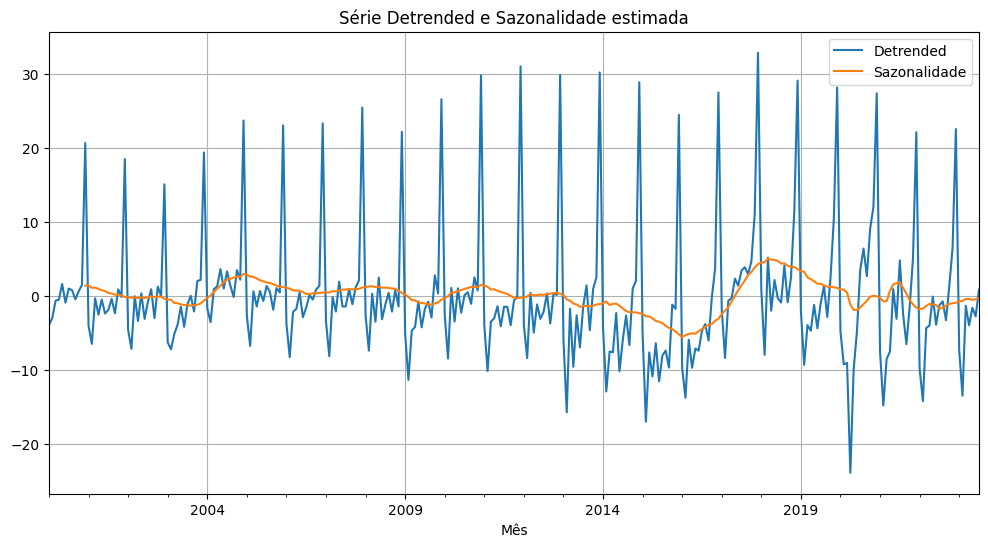

In [8]:
df['seasonality'] = df['detrended'].rolling(window=12).mean()

df['detrended'].plot(figsize=(12,6))
df['seasonality'].plot()
plt.title("Série Detrended e Sazonalidade estimada")
plt.legend(['Detrended', 'Sazonalidade'])
plt.grid(True)
plt.show()

iv. Eliminar a sazonalidade:

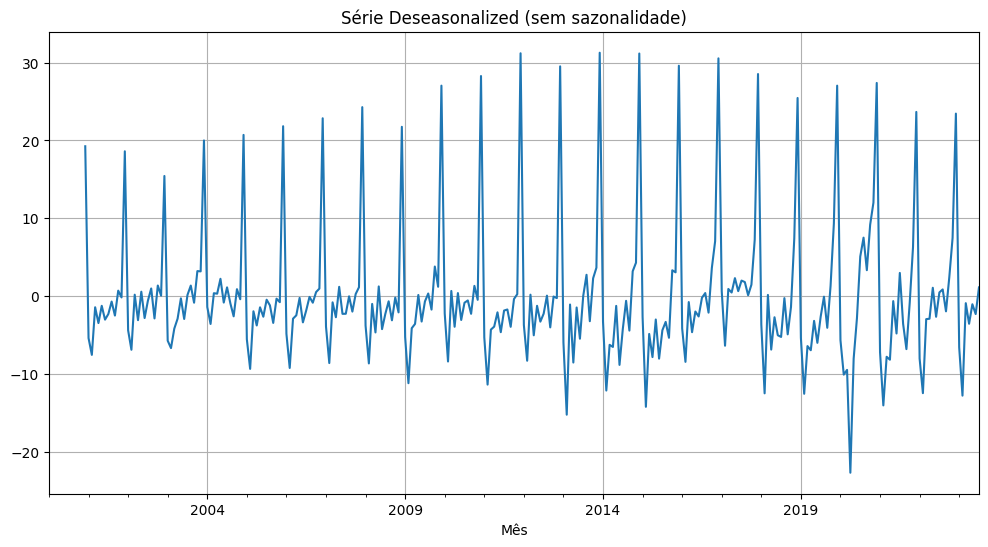

In [13]:
df['deseasonalized'] = df['detrended'] - df['seasonality']
df['deseasonalized'].plot(figsize=(12,6))
plt.title("Série Deseasonalized (sem sazonalidade)")
plt.grid(True)
plt.show()

v. Analisar o resíduo para verificar se pertence a uma distribuição iid:

Usaremos o teste de Shapiro-Wilk para verificar a normalidade do resíduo. Se o valor p for menor que 0,05, rejeitaremos a hipótese nula de que os dados vêm de uma distribuição normal.

In [14]:
residuo = df['deseasonalized'].dropna()
shapiro_results = stats.shapiro(residuo)
print(f"Shapiro test statistic: {shapiro_results[0]}")
print(f"Shapiro test p-value: {shapiro_results[1]}")

Shapiro test statistic: 0.7718788385391235
Shapiro test p-value: 3.6379305112384416e-19


Shapiro test statistic: 0.7718788385391235: O valor do teste estatístico é 0.7719 (aproximadamente). Esse valor, sendo significativamente menor que 1, sugere que a amostra desvia consideravelmente de uma distribuição normal.

Shapiro test p-value: 3.6379305112384416e-19: O valor p é extremamente pequeno, muito menor que o nível de significância comum de 0,05. Esse valor p praticamente zero sugere que devemos rejeitar a hipótese nula, indicando que a amostra não segue uma distribuição normal.

Em resumo, com base nos resultados do teste de Shapiro-Wilk, podemos concluir que a amostra não segue uma distribuição normal.

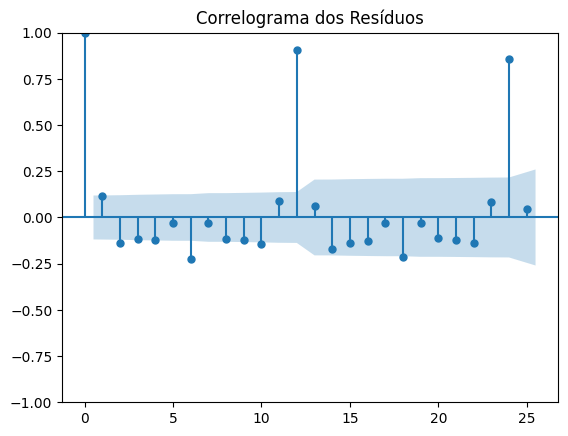

In [15]:
# Gráfico ACF (Correlograma)
# Este gráfico mostra a autocorrelação dos resíduos em diferentes defasagens. Se a série for iid, esperamos que todas as correlações, exceto a defasagem 0, sejam muito próximas de zero.

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuo.dropna())
plt.title("Correlograma dos Resíduos")
plt.show()


In [16]:
# Teste de Ljung-Box:
# Este teste verifica a hipótese nula de que os resíduos são independentes até a defasagem "x". Um valor-p baixo (menor que 0,05) para uma determinada defasagem sugere que os resíduos não são independentes até aquela defasagem.

from statsmodels.stats.diagnostic import acorr_ljungbox

ljungbox_results = acorr_ljungbox(residuo.dropna(), lags=[10], return_df=True)  # Teste até 10 defasagens
print(ljungbox_results)

      lb_stat  lb_pvalue
10  45.790159   0.000002


Os testes implicam que os resíduos não são independentes e, portanto, não são iid (independente e identicamente distribuído). A presença de autocorrelação nos resíduos pode indicar que o modelo não capturou toda a estrutura de dependência nos dados, sugerindo que o modelo pode ser aprimorado ou que outros modelos devem ser considerados.

### Exercício 2

Utilize novamente a série vendas_brasil para testar um mecanismo de previsão. Trata-se de um mecanismo mais simplificado, que terá como base a tendência estimada por uma regressão linear. Realize os seguintes passos:

a. Estime a tendência utilizando regressão linear. Em python, utilize a função fit() do módulo Linear Regression (https://www.statsmodels.org/stable/regression.html)  
b. Elimine a tendência com o valor estimado pela regressão linear  
c. Estime a sazonalidade através das médias móveis  
d. Elimine a sazonalidade  
e. Utilize a função predict() do modelo de regressão linear para gerar a reta de tendência para todos os índices da série  
f. Adicione a tendência estimada à sazonalidade  
g. Adicione ao resultado um ruído de média zero  
h. Compare em um mesmo gráfico a série original e a série prevista


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\alexa\AppData\Local\Temp\ipykernel_16400\3848060281.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('vendas_brasil.csv', parse_dates=['Mês'], dayfirst=True)


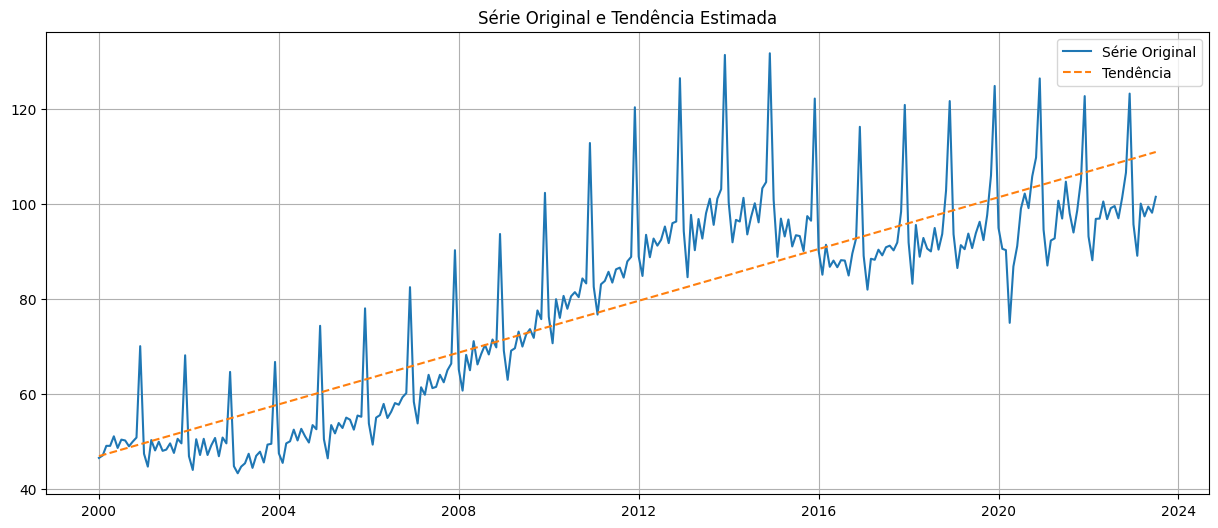

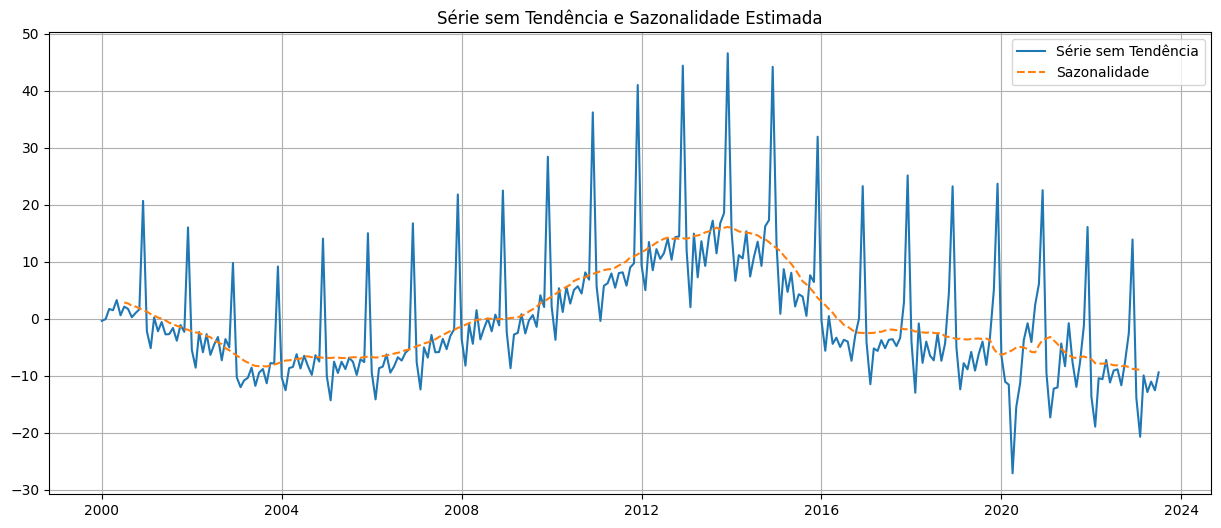

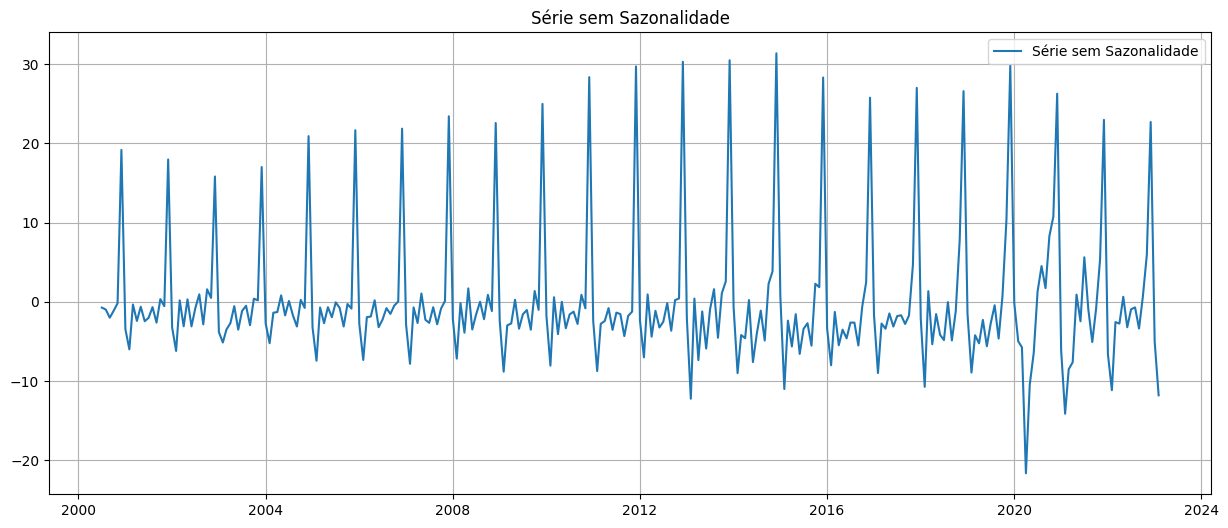

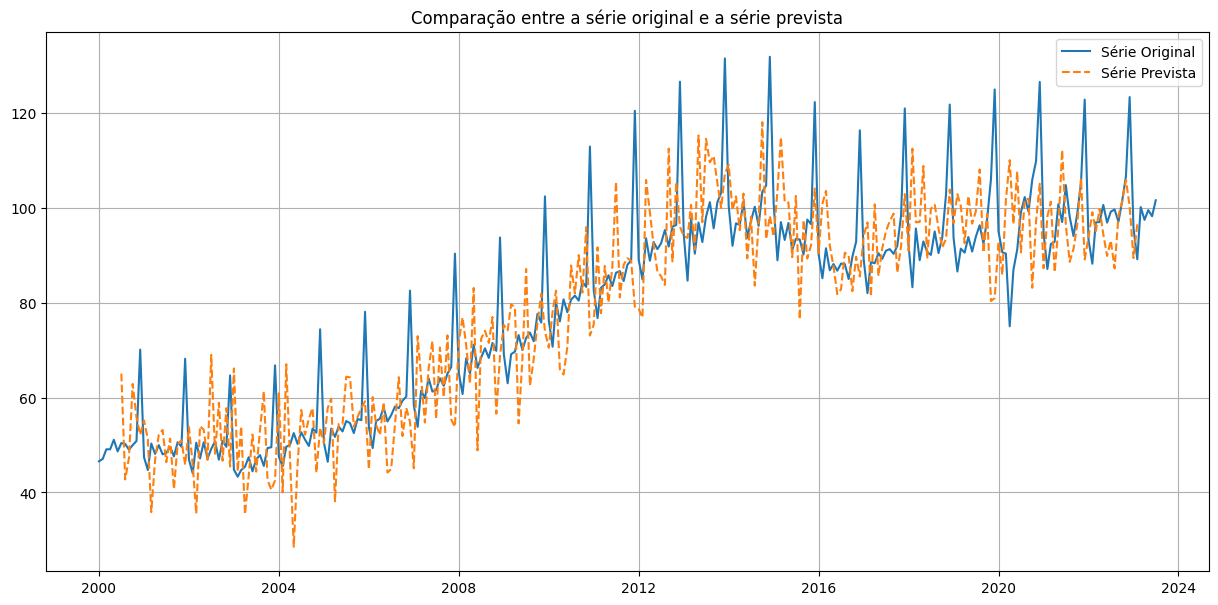

In [18]:
!pip install statsmodels pandas numpy matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregando os dados
df = pd.read_csv('vendas_brasil.csv', parse_dates=['Mês'], dayfirst=True)
df.set_index('Mês', inplace=True)

# a. Estime a tendência utilizando regressão linear.
X = np.arange(len(df)).reshape(-1, 1)  # Cria uma variável independente baseada no índice da série
X = sm.add_constant(X)
y = df['Brasil'].values
model = sm.OLS(y, X).fit()

# b. Elimine a tendência com o valor estimado pela regressão linear
df['Tendência'] = model.predict(X)
df['Sem_Tendência'] = df['Brasil'] - df['Tendência']

# Plotando a série original e a tendência estimada
plt.figure(figsize=(15, 6))
plt.plot(df['Brasil'], label='Série Original')
plt.plot(df['Tendência'], label='Tendência', linestyle='--')
plt.legend()
plt.title("Série Original e Tendência Estimada")
plt.grid(True)
plt.show()

# c. Estime a sazonalidade através das médias móveis
# Assumindo sazonalidade mensal, usamos 12 meses
df['Sazonalidade'] = df['Sem_Tendência'].rolling(window=12, center=True).mean()

# Plotando a série sem tendência e a sazonalidade estimada
plt.figure(figsize=(15, 6))
plt.plot(df['Sem_Tendência'], label='Série sem Tendência')
plt.plot(df['Sazonalidade'], label='Sazonalidade', linestyle='--')
plt.legend()
plt.title("Série sem Tendência e Sazonalidade Estimada")
plt.grid(True)
plt.show()

# d. Elimine a sazonalidade
df['Sem_Sazonalidade'] = df['Sem_Tendência'] - df['Sazonalidade']

# Plotando a série sem sazonalidade
plt.figure(figsize=(15, 6))
plt.plot(df['Sem_Sazonalidade'], label='Série sem Sazonalidade')
plt.legend()
plt.title("Série sem Sazonalidade")
plt.grid(True)
plt.show()

# f. Adicione a tendência estimada à sazonalidade
df['Tendência_Sazonalidade'] = df['Tendência'] + df['Sazonalidade']

# g. Adicione ao resultado um ruído de média zero
ruído = np.random.normal(0, df['Sem_Sazonalidade'].std(), len(df))
df['Previsão'] = df['Tendência_Sazonalidade'] + ruído

# h. Compare em um mesmo gráfico a série original e a série prevista
plt.figure(figsize=(15, 7))
plt.plot(df['Brasil'], label='Série Original')
plt.plot(df['Previsão'], label='Série Prevista', linestyle='--')
plt.legend()
plt.title("Comparação entre a série original e a série prevista")
plt.grid(True)
plt.show()
